### Parameters

In [10]:
data_path = r".\Data\\"
submiss_path = r".\Prediction\\"
#hallo tijl

### Imports

In [11]:
# Algemeen
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

# Hyper-parameter optimizing
from sklearn.model_selection import RandomizedSearchCV; from scipy.stats import uniform, randint

# Read Data in DataFrame

In [12]:
# Training
train_set = pd.read_csv(data_path+"train.csv")
train_y = train_set['target']
train_X = train_set.drop(labels = ['target','id'], axis = 1)

# Testing
test_set = pd.read_csv(data_path+"test.csv")
test_X = test_set.drop(labels = 'id', axis = 1)

train_set.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


### get basic information

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [ ]:
# train_set['feature naam'].value_counts() # only for categorical data

In [6]:
train_set.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


### Histograms

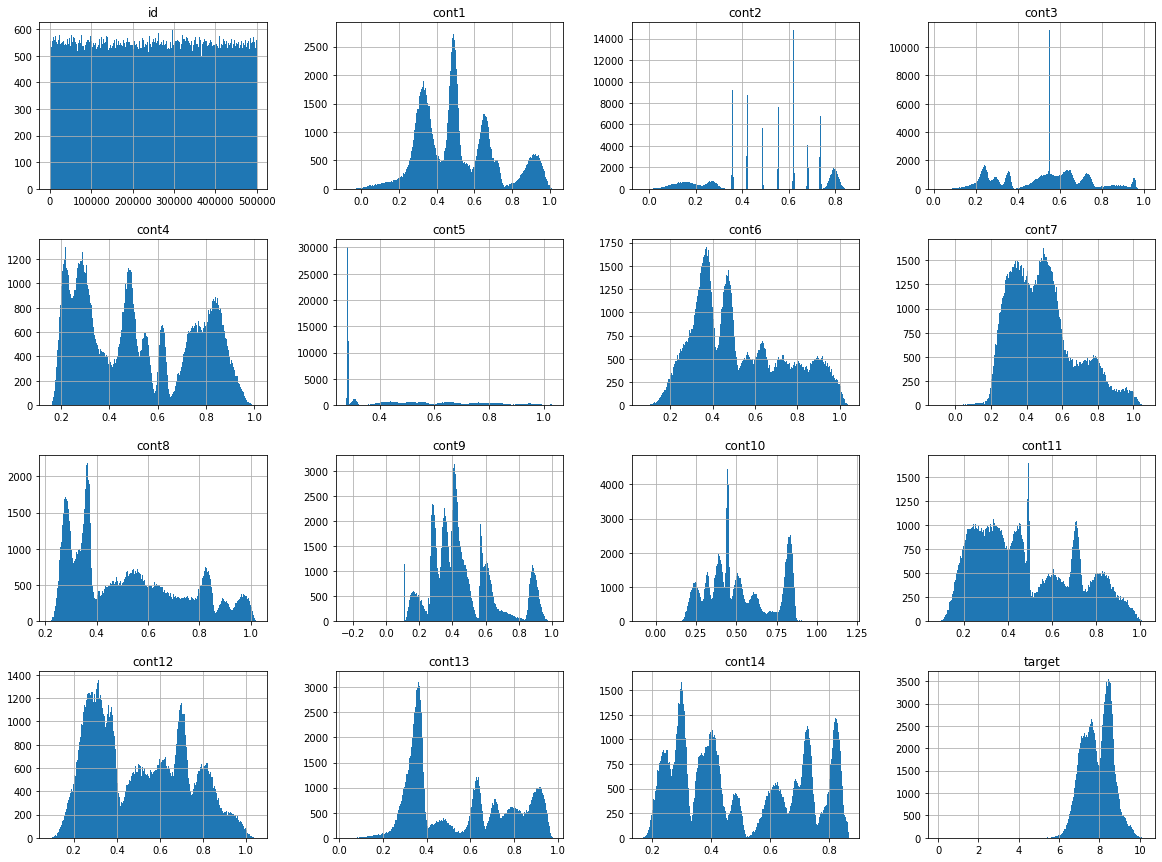

In [8]:
train_set.hist(bins = int(np.sqrt(len(train_set['target']))), figsize=(20,15));

### Correlation Matrix

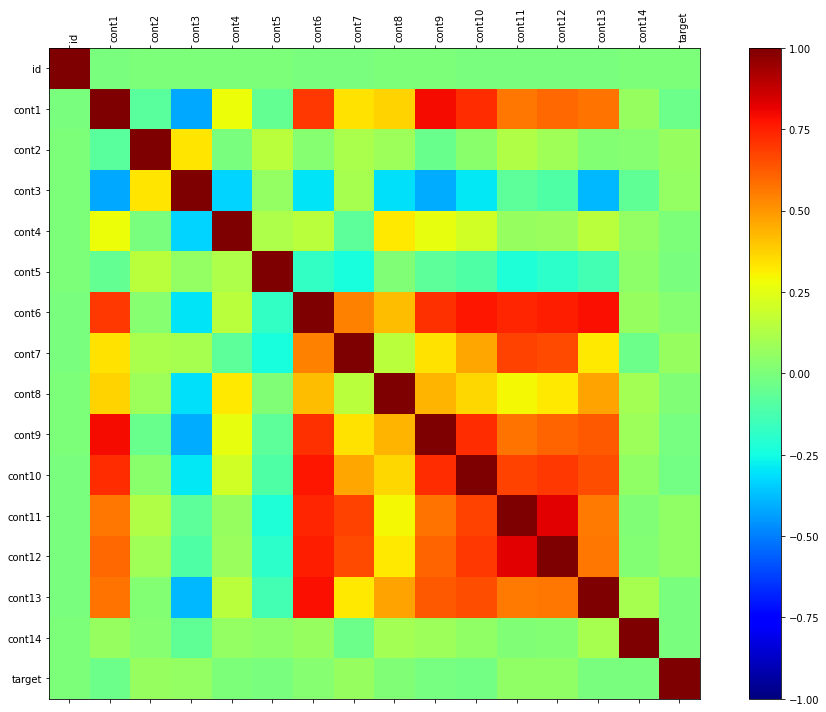

In [43]:
from matplotlib import cm as cm
def plot_correlation_matrix(df):
    """Takes a pandas dataframe as input"""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
    plt.jet() # set the colormap to jet
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1)

    ticks = list(range(len(df.columns)))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(df.columns, rotation=90, horizontalalignment='left')
    ax.set_yticklabels(df.columns)
    
    fig.colorbar(cax, ticks=[-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0])

    plt.tight_layout()
    plt.show()
    
plot_correlation_matrix(train_set)

### Scatter Matrix

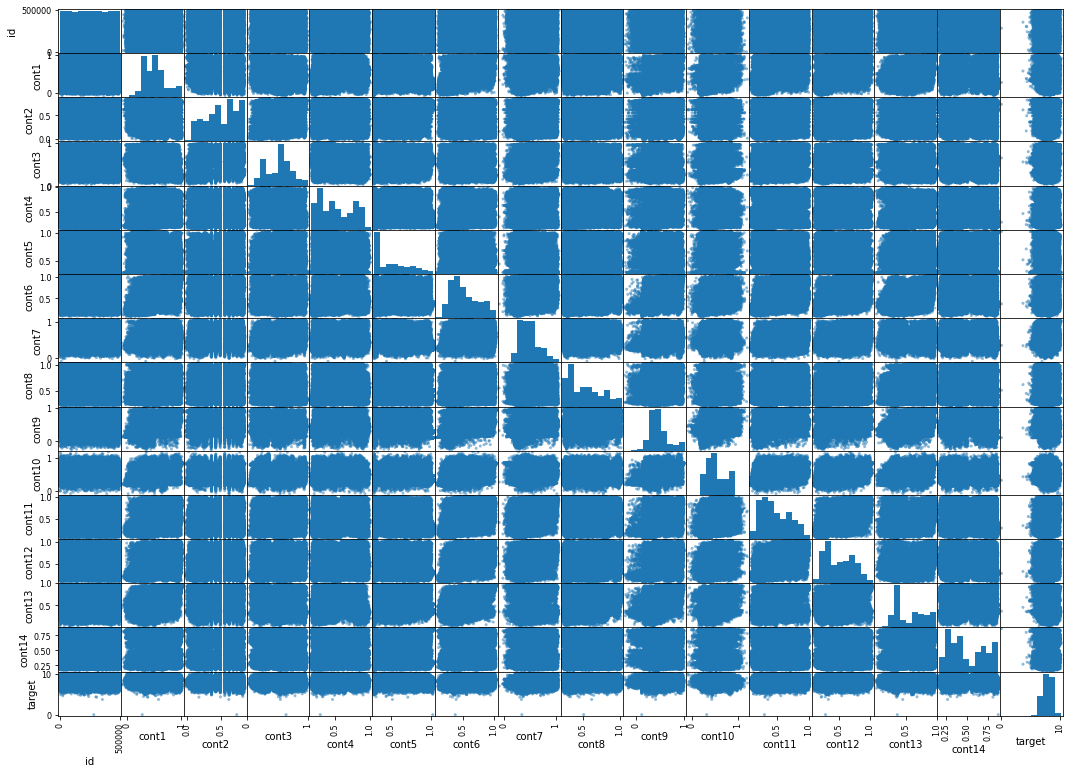

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set,figsize = (18,13))
plt.show()

In [32]:
print(train_set['target'][train_set['target']<5])

3964      4.858273
15222     4.605457
15716     4.944195
93733     4.862043
104211    4.700393
107801    4.978676
120348    4.940681
122352    4.791515
123116    4.821090
125305    4.932971
141984    4.809483
144979    4.417209
170514    0.000000
180587    4.346322
184298    4.256207
213276    4.851247
213614    3.700459
249775    4.870357
Name: target, dtype: float64


### Scatterplots wrt target

Symmetrie rond average??

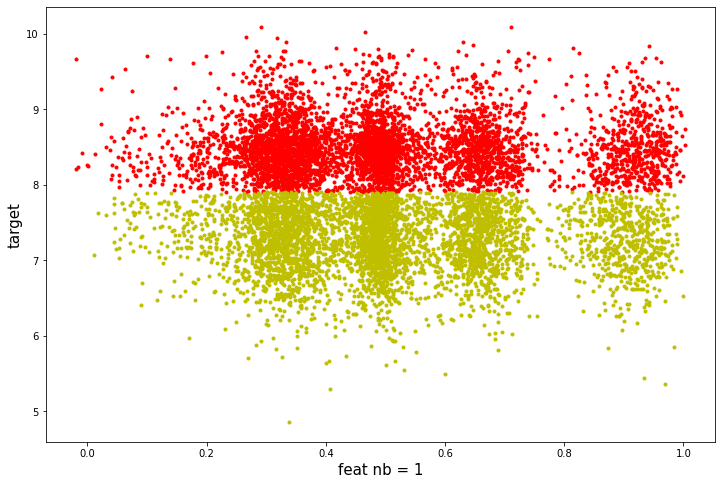

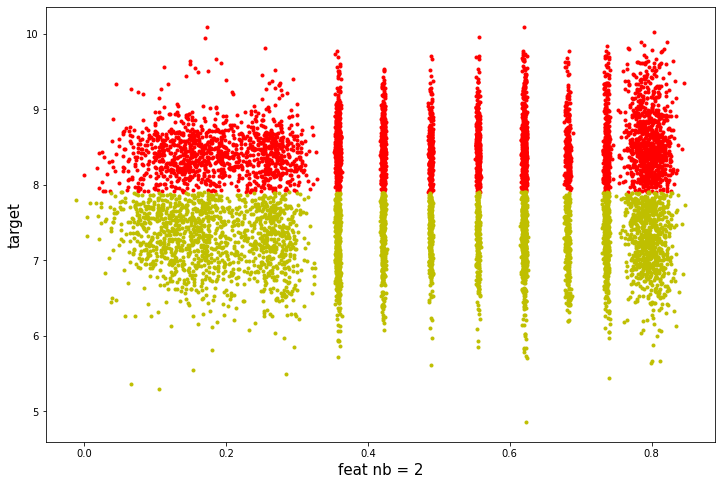

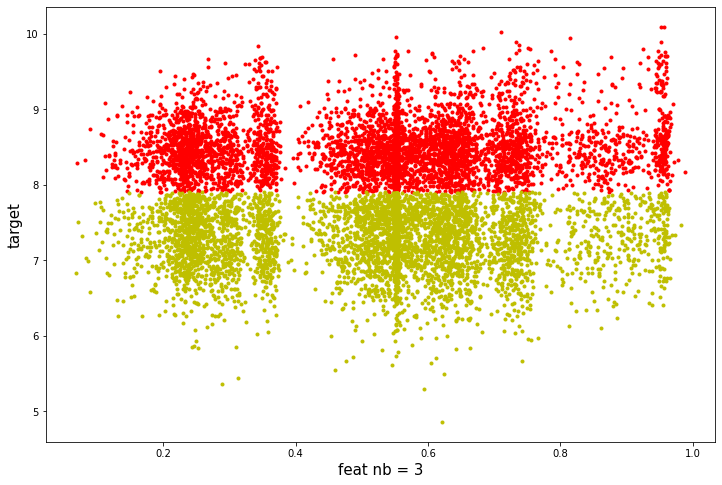

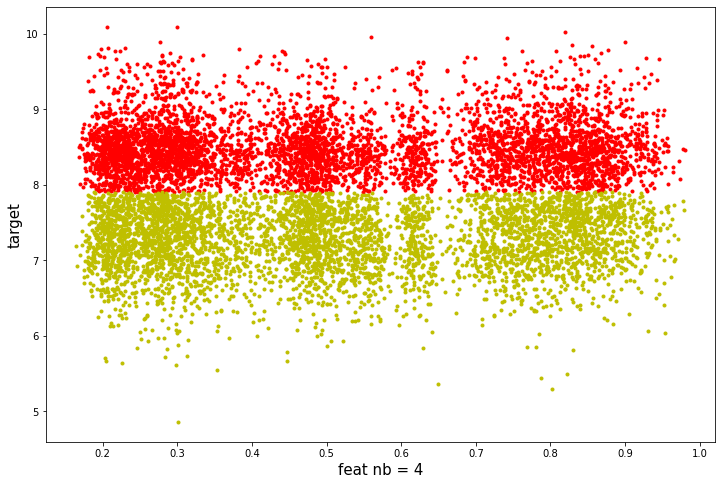

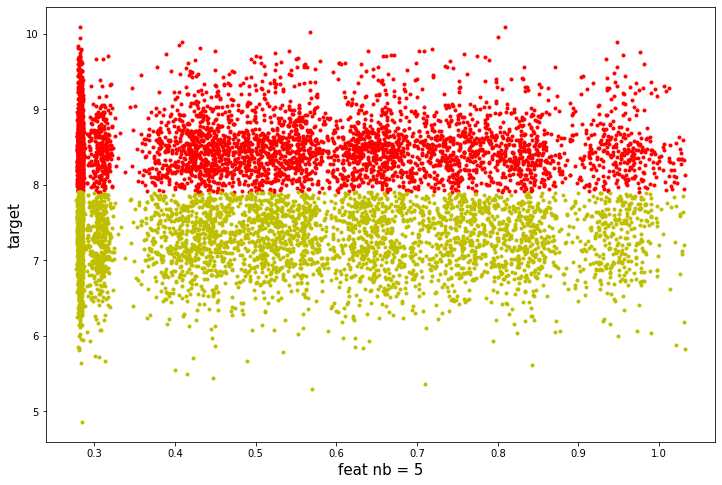

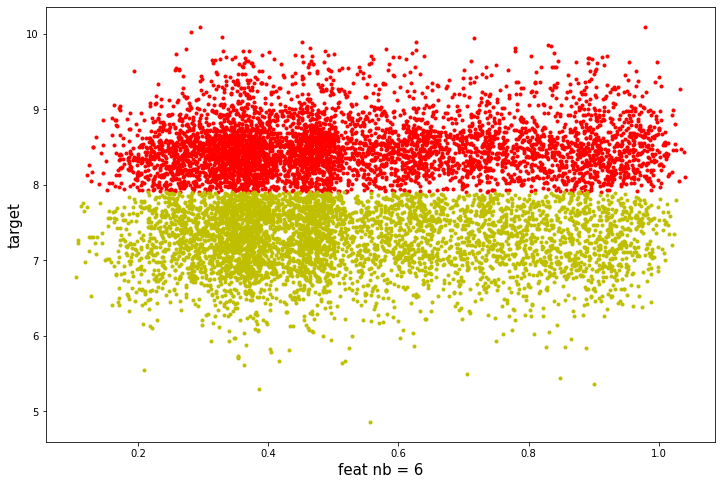

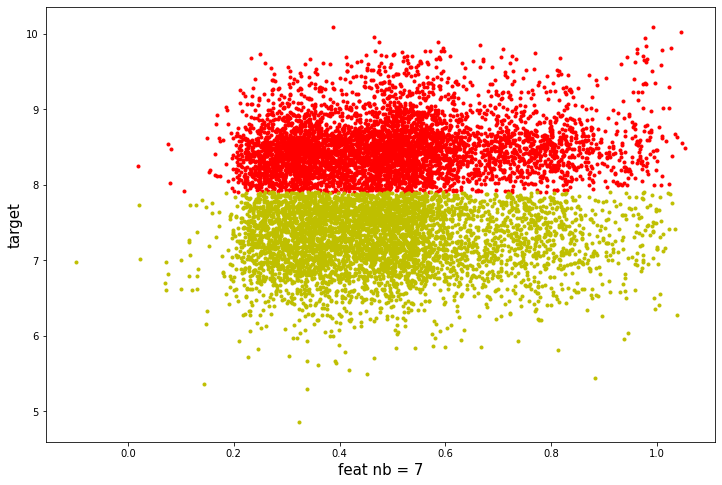

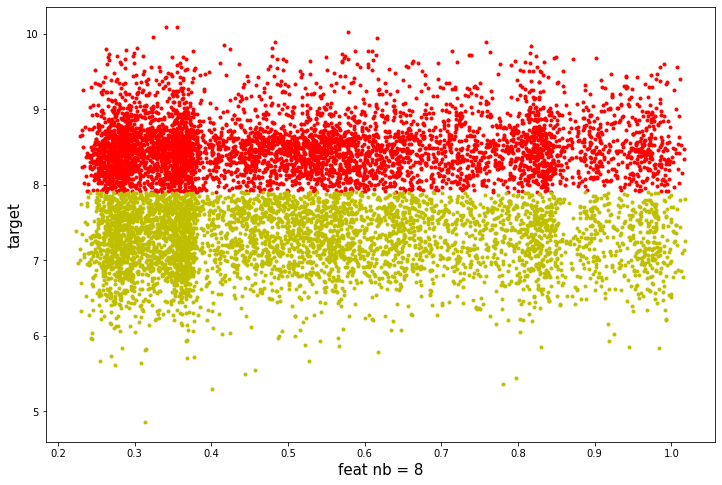

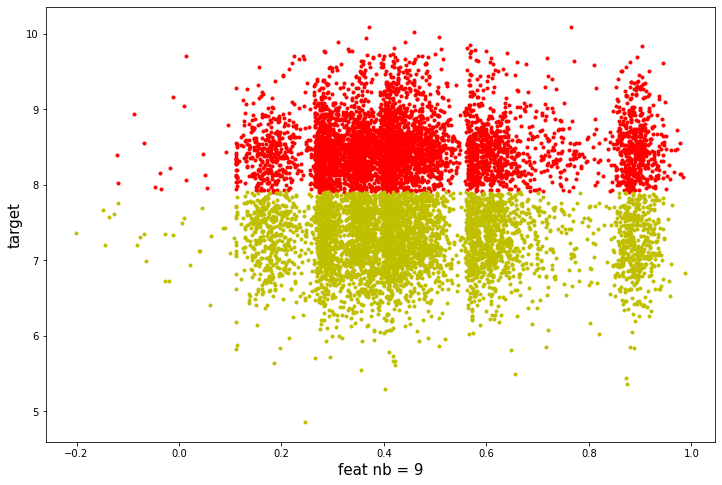

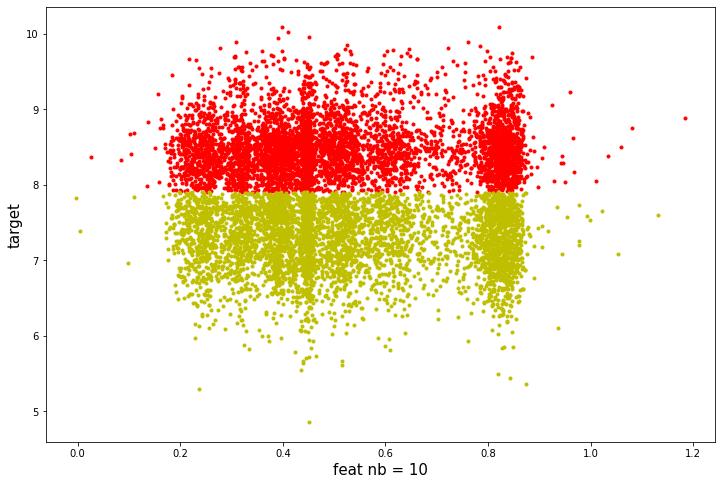

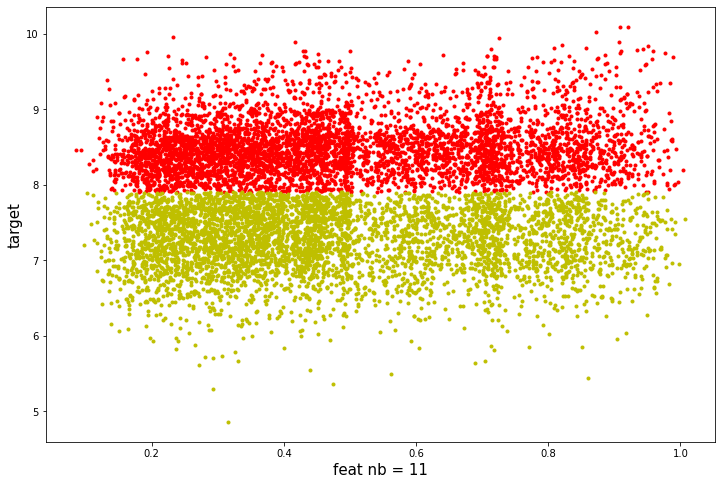

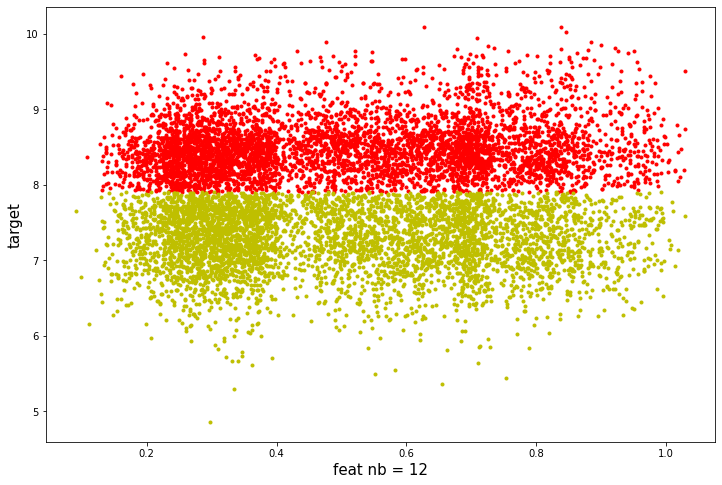

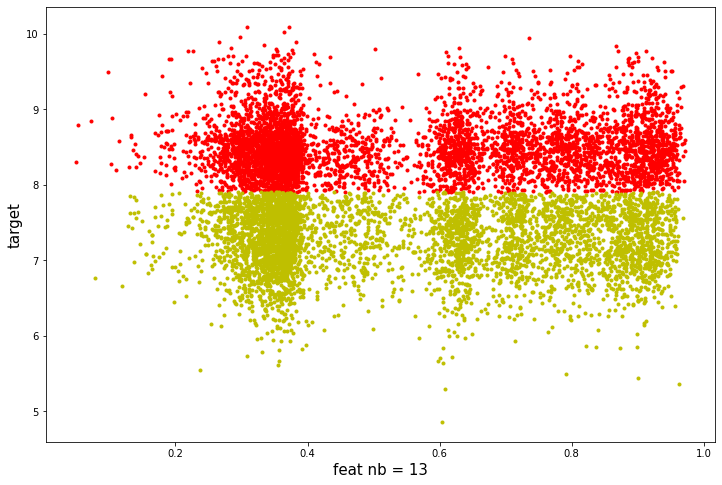

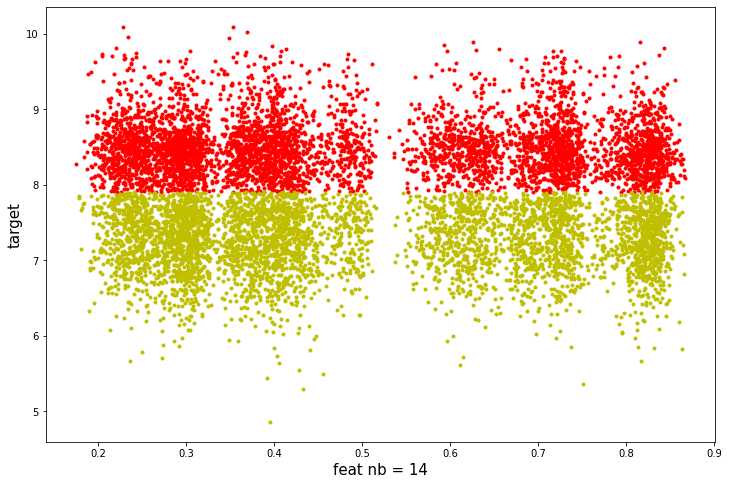

In [24]:
feat_nbs = range(1,15)
avg = np.average(train_y)

for feat_nb in feat_nbs:
    plt.figure(figsize = (12,8))
    plt.plot(train_X['cont'+str(feat_nb)][train_y>avg],train_y[train_y>avg],'r.')
    plt.plot(train_X['cont'+str(feat_nb)][train_y<avg],train_y[train_y<avg],'y.')
    plt.xlabel('feat nb = '+str(feat_nb), fontsize = 15)
    plt.ylabel('target', fontsize = 15)

### Scatterplots Between Features

Text(0, 0.5, 'feat nb = 3')

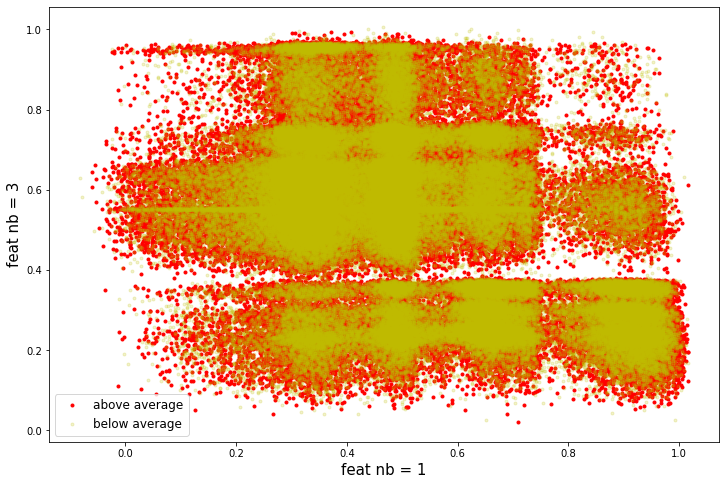

In [60]:
feat_nb1 = 1
feat_nb2 = 3

avg = np.average(train_y)

plt.figure(figsize = (12,8))
plt.plot(train_X['cont'+str(feat_nb1)][train_y>avg],train_X['cont'+str(feat_nb2)][train_y>avg],'r.')
plt.plot(train_X['cont'+str(feat_nb1)][train_y<avg],train_X['cont'+str(feat_nb2)][train_y<avg],'y.',alpha = 0.2)
plt.xlabel('feat nb = '+str(feat_nb1), fontsize = 15)
plt.legend(['above average', 'below average'], fontsize = 12)
plt.ylabel('feat nb = '+str(feat_nb2), fontsize = 15)

### PCA Analysis

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
X_r = pca.fit_transform(train_X)

,0,1,2,3,4,5
0,1.000000e+00,-4.233791e-16,-1.671051e-16,2.176486e-17,-1.630071e-16,-8.787019e-17
1,-4.233791e-16,1.000000e+00,-5.213711e-16,1.877408e-16,3.144019e-16,4.579439e-16
2,-1.671051e-16,-5.213711e-16,1.000000e+00,2.667930e-16,-2.695183e-16,2.182067e-16
3,2.176486e-17,1.877408e-16,2.667930e-16,1.000000e+00,-3.081078e-16,-1.457858e-16
4,-1.630071e-16,3.144019e-16,-2.695183e-16,-3.081078e-16,1.000000e+00,-1.802375e-15
5,-8.787019e-17,4.579439e-16,2.182067e-16,-1.457858e-16,-1.802375e-15,1.000000e+00


In [46]:
np.sum(pca.explained_variance_ratio_)

0.8295147084885319

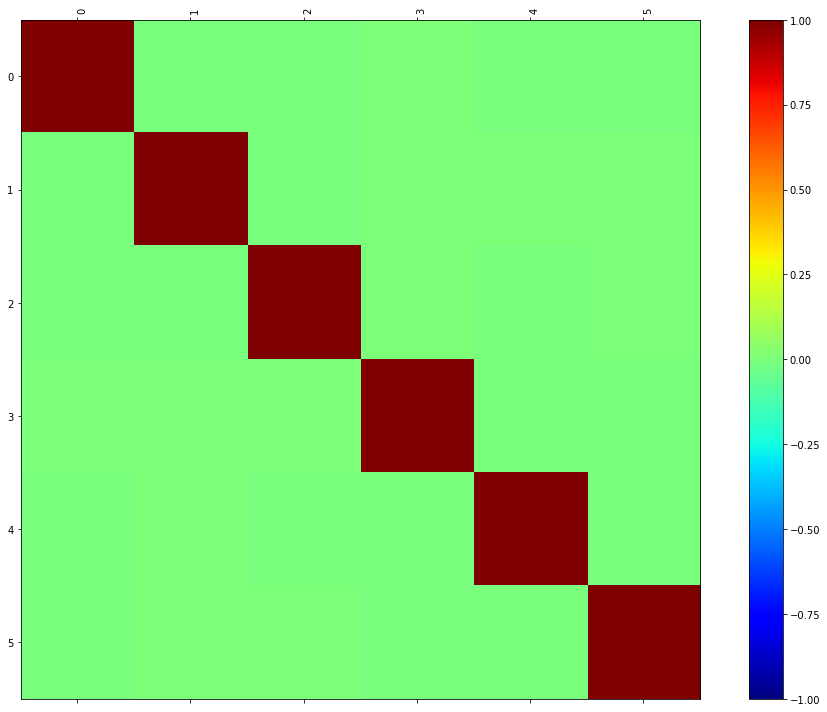

In [47]:
plot_correlation_matrix(pd.DataFrame(X_r))